# Projected PCA

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import os

from seq_utils import letters_to_nums, sequences_from_fasta, one_hot_seq_batch
from PCA_func import plot_projected_pca, plot_pca_of_sequences, plot_two_pca_side_by_side

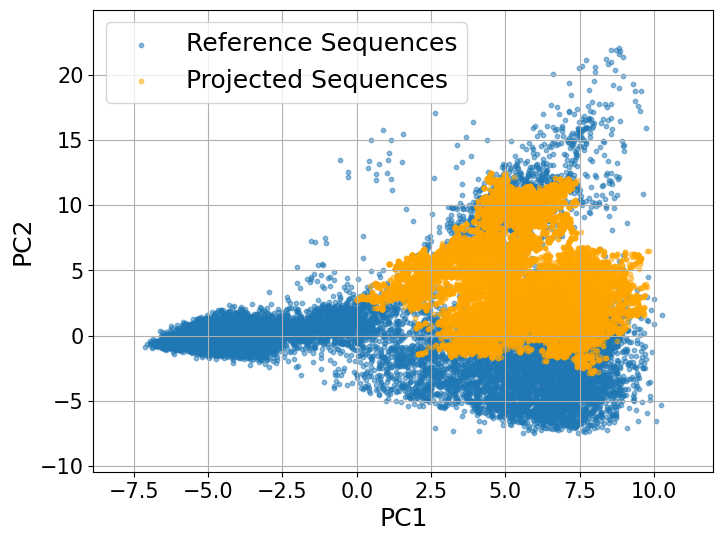

In [12]:
"""
    One-hot encode AA sequences - plm generated and true
"""
# -------------- Load generated sequences ----------------
file_dir='mc_generated_sequences'
#filename = 'gen_seqs_w_init_seq_Ns40000_r0.1'
#filename = 'generated_sequences_randinit_40000'
filename = 'mc_generated_sequences_randinit_100000'
#file_dir = 'mc_generated_sequences'
#filename = 'mc_gen_seqs_w_init_seq_Ns100000_r0.1'

cwd = '/Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main'
#cwd=r'C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main'

# Load the generated sequences
output_file = cwd + f'/CODE/AttentionDCA_python/src/PLM/{file_dir}/{filename}.npy'
#output_file = cwd + f'\CODE\AttentionDCA_python\src\PLM\{file_dir}\{filename}.npy'
gen_sequences = np.load(output_file)
saved_seq = gen_sequences.copy()
Ni = 5000
Nf = 30000
gen_sequences = gen_sequences[Ni:Nf]


# -------------- Load train sequences ----------------
# Load train sequences
family = 'jdoms_bacteria_train2'
filename = cwd + f'/CODE/DataAttentionDCA/jdoms/{family}.fasta'

#filename = cwd + f'\CODE\DataAttentionDCA\jdoms\{family}.fasta'

train_sequences = sequences_from_fasta(filename)
train_sequences_num = [letters_to_nums(seq) for seq in train_sequences]


plot_projected_pca(
    sequences_reference=train_sequences,
    sequences_to_project=gen_sequences,
    title="PCA Projection: Train vs Generated"
)

Loading: /Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main/CODE/AttentionDCA_python/src/PLM/generated_sequences/generated_sequences_randinit_40000.npy


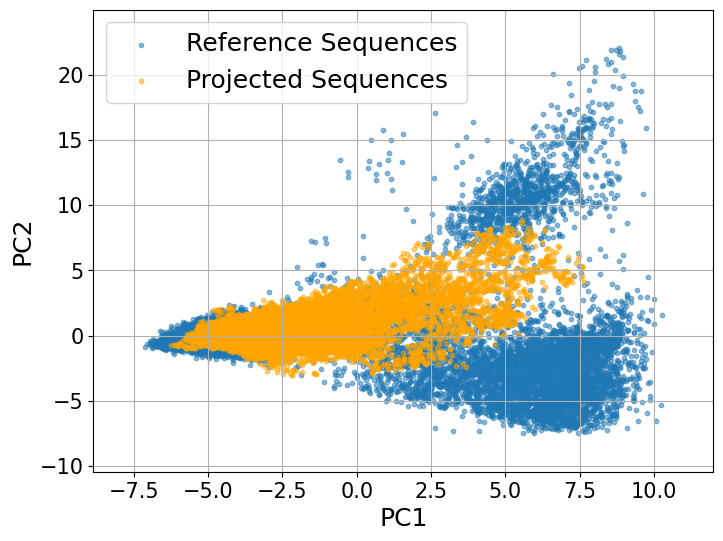

Saved PCA plot to: /Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main/CODE/AttentionDCA_python/src/PLM/results/PCA_plots/plm/generated_sequences_randinit_40000.png
Loading: /Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main/CODE/AttentionDCA_python/src/PLM/generated_sequences/gen_seqs_w_init_seq_Ns40000_r0.1.npy


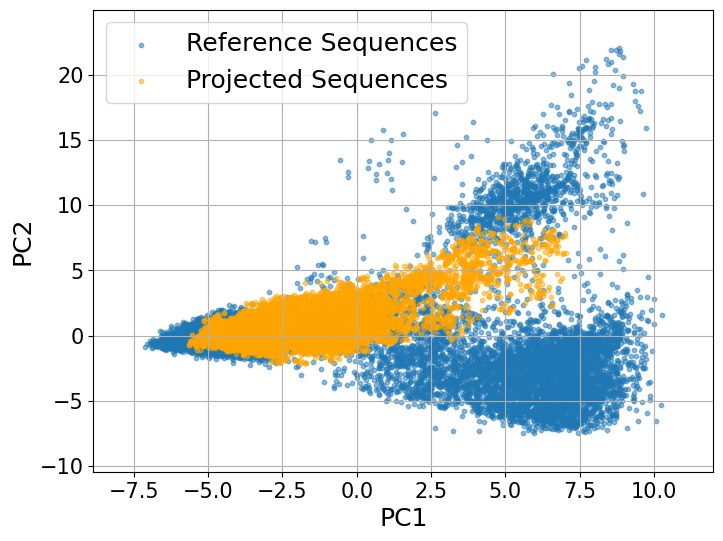

Saved PCA plot to: /Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main/CODE/AttentionDCA_python/src/PLM/results/PCA_plots/plm/gen_seqs_w_init_seq_Ns40000_r0.1.png
File not found: /Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main/CODE/AttentionDCA_python/src/PLM/mc_generated_sequences/mc_generated_sequences_randinit_300000.npy


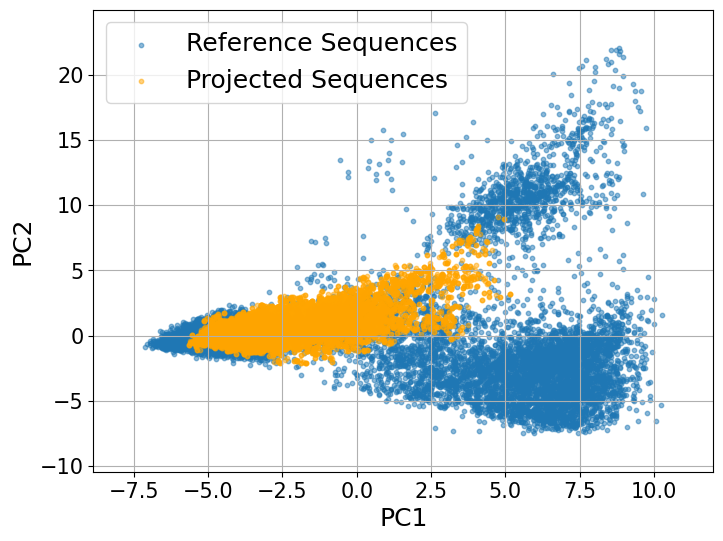

Saved PCA plot to: /Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main/CODE/AttentionDCA_python/src/PLM/results/PCA_plots/mc/mc_generated_sequences_randinit_300000.png
Loading: /Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main/CODE/AttentionDCA_python/src/PLM/mc_generated_sequences/mc_gen_seqs_w_init_seq_Ns100000_r0.1.npy


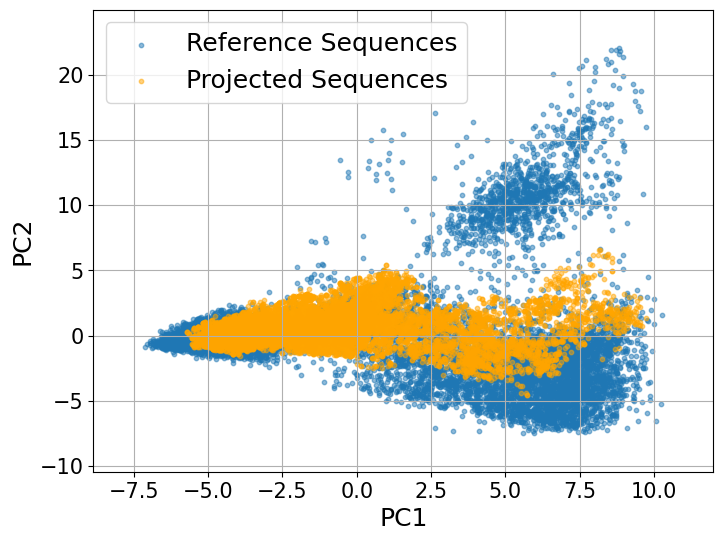

Saved PCA plot to: /Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main/CODE/AttentionDCA_python/src/PLM/results/PCA_plots/mc/mc_gen_seqs_w_init_seq_Ns100000_r0.1.png
Loading: /Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main/CODE/AttentionDCA_python/src/PLM/gill_generated_sequences/gill_gen_seqs_w_init_seq_Ns30000_r0.3_after_mod.npy


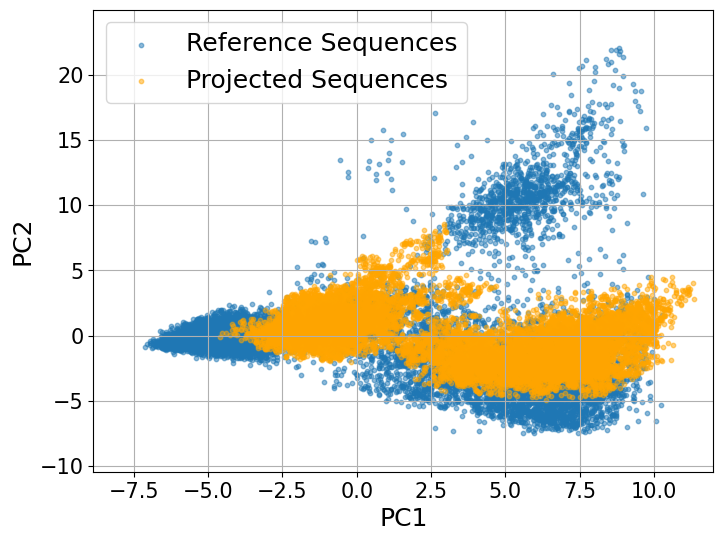

Saved PCA plot to: /Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main/CODE/AttentionDCA_python/src/PLM/results/PCA_plots/gillespie/gill_gen_seqs_w_init_seq_Ns30000_r0.3_after_mod.png
Loading: /Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main/CODE/AttentionDCA_python/src/PLM/gill_generated_sequences/gill_generated_sequences_randinit_20000.npy


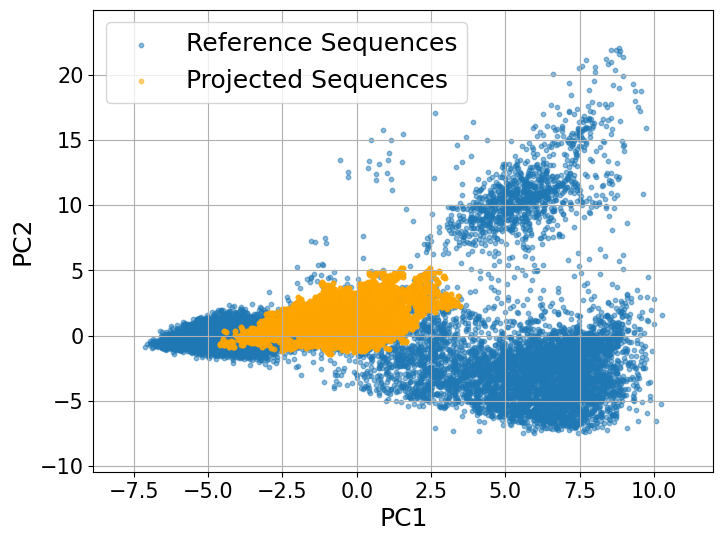

Saved PCA plot to: /Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main/CODE/AttentionDCA_python/src/PLM/results/PCA_plots/gillespie/gill_generated_sequences_randinit_20000.png


In [4]:
file_map = {
    'generated_sequences_randinit_40000': 'generated_sequences',
    'gen_seqs_w_init_seq_Ns40000_r0.1': 'generated_sequences',
    'mc_generated_sequences_randinit_300000': 'mc_generated_sequences',
    'mc_gen_seqs_w_init_seq_Ns100000_r0.1': 'mc_generated_sequences',
    'gill_gen_seqs_w_init_seq_Ns30000_r0.3_after_mod':'gill_generated_sequences',
    'gill_generated_sequences_randinit_20000':'gill_generated_sequences'
}


for filename, dir in file_map.items():
    cwd = os.getcwd()

    if dir=='generated_sequences':
        save_subdir = 'plm' 
    elif dir=='mc_generated_sequences':
        save_subdir='mc'
    elif dir=='gill_generated_sequences':
        save_subdir='gillespie'

    save_path = os.path.join(cwd, 'results', 'PCA_plots', save_subdir)
    os.makedirs(save_path, exist_ok=True)
    #cwd=r'C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main'

    cwd = '/Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main'
    output_file = os.path.join(cwd, 'CODE', 'AttentionDCA_python', 'src', 'PLM', dir, f'{filename}.npy')

    if os.path.exists(output_file):
        print(f"Loading: {output_file}")
        gen_sequences = np.load(output_file)
        # proceed with PCA or other processing...
    else:
        print(f"File not found: {output_file}")
    start_idx = 5000
    num_samples = len(train_sequences)
    gen_sequences = gen_sequences[start_idx:]
    
    # Uniformly sample indices
    indices = np.linspace(0, len(gen_sequences) - 1, num_samples, dtype=int)
    gen_sequences = gen_sequences[indices]
    save_name = save_path + f'/{filename}.png'
    plot_projected_pca(
        sequences_reference=train_sequences,
        sequences_to_project=gen_sequences,
        title=f"PCA Projection: Train vs {dir}",
        max_pot=21, save_path=save_name
    )
    print(f"Saved PCA plot to: {save_name}")

Loading: gen_seqs_w_init_seq_Ns40000_r0.1 and generated_sequences_randinit_40000


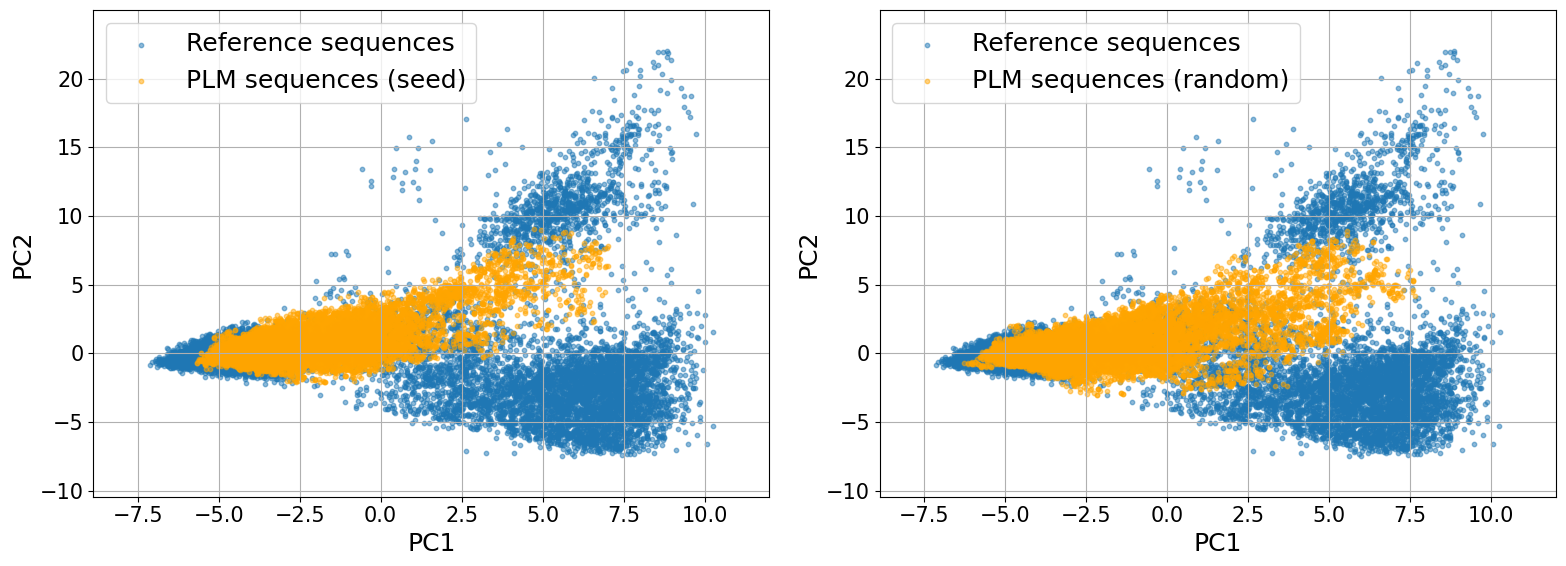

Saved comparison plot to: /Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main/CODE/AttentionDCA_python/src/PLM/results/PCA_plots/pairwise_comparison/compare_gen_seqs_w_init_seq_Ns40000_r0.1_vs_generated_sequences_randinit_40000.png
Loading: mc_gen_seqs_w_init_seq_Ns100000_r0.1_b1 and mc_generated_sequences_randinit_100000


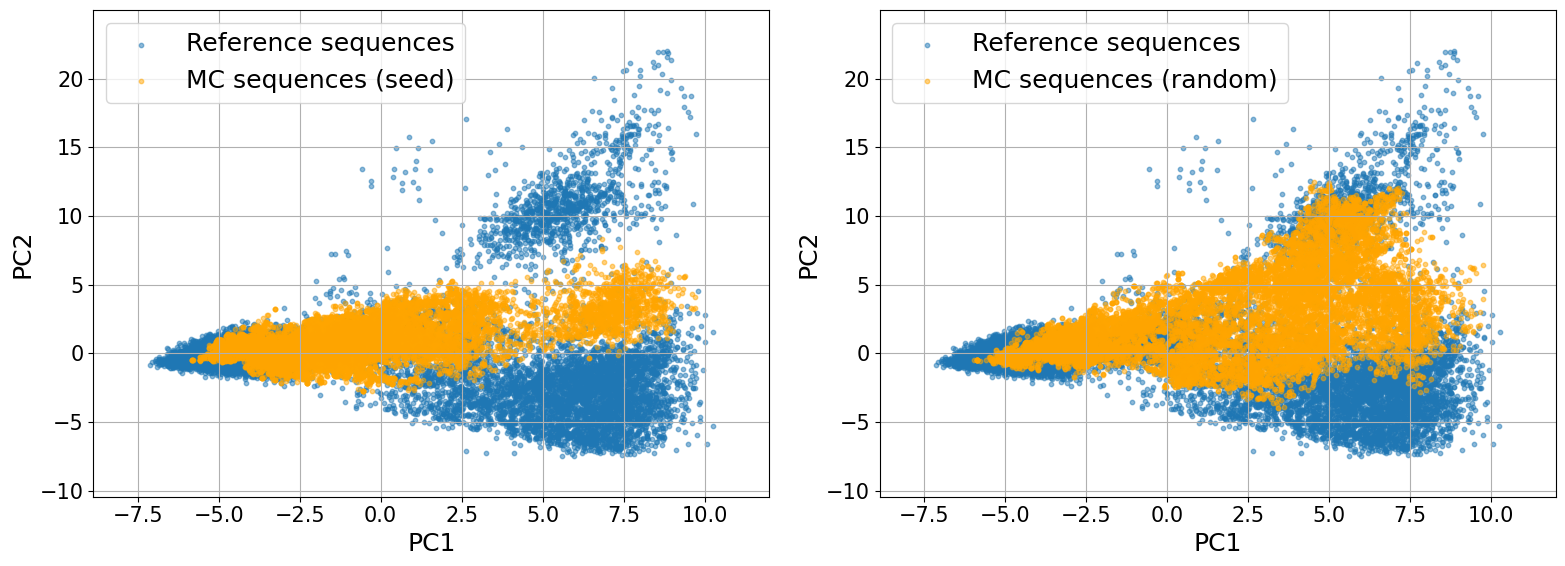

Saved comparison plot to: /Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main/CODE/AttentionDCA_python/src/PLM/results/PCA_plots/pairwise_comparison/compare_mc_gen_seqs_w_init_seq_Ns100000_r0.1_b1_vs_mc_generated_sequences_randinit_100000.png
Loading: gill_gen_seqs_w_init_seq_Ns30000_r0.3_after_mod and gill_generated_sequences_randinit_20000


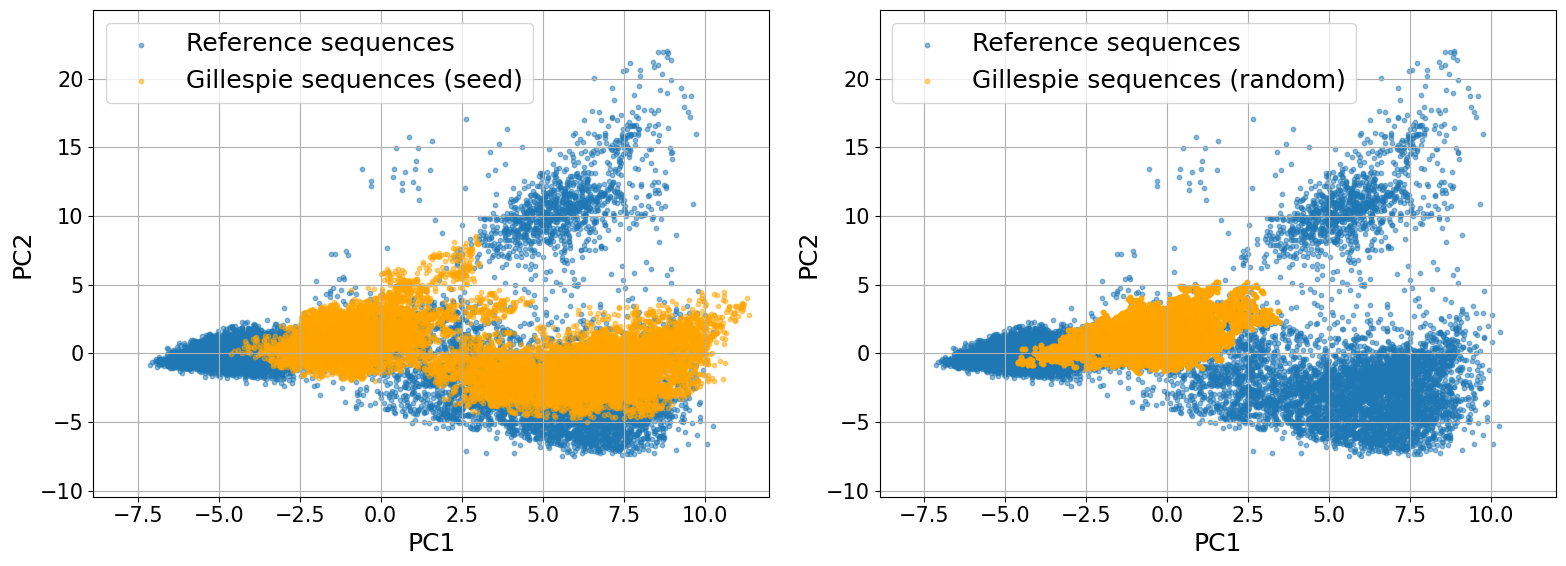

Saved comparison plot to: /Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main/CODE/AttentionDCA_python/src/PLM/results/PCA_plots/pairwise_comparison/compare_gill_gen_seqs_w_init_seq_Ns30000_r0.3_after_mod_vs_gill_generated_sequences_randinit_20000.png


In [5]:
# Define model pairs to compare
comparison_pairs = [
    ('gen_seqs_w_init_seq_Ns40000_r0.1', 'generated_sequences_randinit_40000'),
    ('mc_gen_seqs_w_init_seq_Ns100000_r0.1_b1','mc_generated_sequences_randinit_100000'),
    ('gill_gen_seqs_w_init_seq_Ns30000_r0.3_after_mod', 'gill_generated_sequences_randinit_20000')
]

file_map = {
    'generated_sequences_randinit_40000': 'generated_sequences',
    'gen_seqs_w_init_seq_Ns40000_r0.1': 'generated_sequences',
    'mc_generated_sequences_randinit_100000': 'mc_generated_sequences',
    'mc_gen_seqs_w_init_seq_Ns100000_r0.1_b1': 'mc_generated_sequences',
    'gill_gen_seqs_w_init_seq_Ns30000_r0.3_after_mod': 'gill_generated_sequences',
    'gill_generated_sequences_randinit_20000': 'gill_generated_sequences'
}

label_map = {
    'generated_sequences_randinit_40000': 'PLM sequences (random)',
    'gen_seqs_w_init_seq_Ns40000_r0.1': 'PLM sequences (seed)',
    'mc_generated_sequences_randinit_100000': 'MC sequences (random)',
    'mc_gen_seqs_w_init_seq_Ns100000_r0.1_b1': 'MC sequences (seed)',
    'gill_gen_seqs_w_init_seq_Ns30000_r0.3_after_mod': 'Gillespie sequences (seed)',
    'gill_generated_sequences_randinit_20000': 'Gillespie sequences (random)'
}

for file1, file2 in comparison_pairs:
    dir1 = file_map[file1]
    dir2 = file_map[file2]
    label1 = label_map[file1]
    label2 = label_map[file2]

    # Load generated sequences
    #cwd = r'C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main'
    cwd = '/Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main'

    file_path1 = os.path.join(cwd, 'CODE', 'AttentionDCA_python', 'src', 'PLM', dir1, f'{file1}.npy')
    file_path2 = os.path.join(cwd, 'CODE', 'AttentionDCA_python', 'src', 'PLM', dir2, f'{file2}.npy')

    if not os.path.exists(file_path1) or not os.path.exists(file_path2):
        print(f"Missing one or both files: {file_path1}, {file_path2}")
        continue

    print(f"Loading: {file1} and {file2}")
    gen1 = np.load(file_path1)
    gen2 = np.load(file_path2)

    # Match length to train_sequences
    start_idx = 5000
    num_samples = len(train_sequences)
    gen1 = gen1[start_idx:]
    gen2 = gen2[start_idx:]

    indices1 = np.linspace(0, len(gen1) - 1, num_samples, dtype=int)
    indices2 = np.linspace(0, len(gen2) - 1, num_samples, dtype=int)

    gen1 = gen1[indices1]
    gen2 = gen2[indices2]

    # Save directory
    save_path = os.path.join(os.getcwd(), 'results', 'PCA_plots', 'pairwise_comparison')
    os.makedirs(save_path, exist_ok=True)
    save_name = os.path.join(save_path, f'compare_{file1}_vs_{file2}.png')

    # Plot
    plot_two_pca_side_by_side(
        sequences_reference=train_sequences,
        proj1=gen1,
        proj2=gen2,
        label1=label1,
        label2=label2,
        save_path=save_name
        )
    print(f"Saved comparison plot to: {save_name}")
